## soft voting
> **不同算法应该有权值**

> **要求每个模型应该计算概率(逻辑回归)**

<img src='./picture/2-1.png'>
<img src='./picture/2-2.png'>
<img src='./picture/2-3.png'>

## 概率模型
> **决策树（信息熵）， knn， 逻辑回归都是概率模型**

> **svm只是找margin不支持概率，但是可以算出概率**

<img src='./picture/2-4.png'>
<img src='./picture/2-5.png'>
<img src='./picture/2-6.png'>
<img src='./picture/2-7.png'>


## 使用soft voting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
X, y = datasets.make_moons(n_samples=500,noise=0.3, random_state=42)

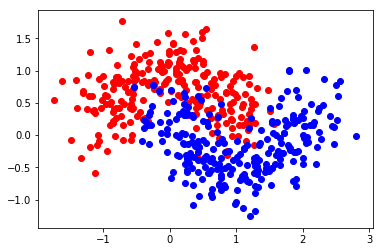

In [2]:
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')
plt.show()

In [3]:
import sys
sys.path.append('E:\github\ml_practice\ml_python')
from model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)

---
硬分类

In [5]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf',SVC()),
    ('dt_clf', DecisionTreeClassifier())  
], voting='hard')

voting_clf.fit(X_train , y_train)
voting_clf.score(X_test, y_test)

D:\software\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.87

---
软分类

In [6]:
voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf',SVC(probability=True)),
    ('dt_clf', DecisionTreeClassifier())  
], voting='soft')

In [7]:
voting_clf.fit(X_train , y_train)
voting_clf.score(X_test, y_test)

D:\software\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.84